# About this implementation

- Uses l2 regularization term
- Solver for fitting is the default 'lbfgs' solver
- Used random states in the test/train split and also in the model solver

** Note: typically, tune the penalty term in general, but I didn't fonow.**

### Results
F1 Score (y=0) 0.96

F1 Score (y=1) 0.98

Currently using the L2 penalty with C=lam=1.0

### Step 1: import the dataset and prepare the data

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# load dataset
dataset = datasets.load_breast_cancer()

In [4]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
# split test train
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=42)

In [8]:
# scale the X values of the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # 'fit' stats.. mean, etc. then 'transform'
X_test = scaler.transform(X_test) # uses previous 'fit' for this test set, and 'transforms'

### Step 2: define the model, train the model

Does a gradient descent variant. Results in the optimal theta params (given the penalty term)

In [9]:
from sklearn.linear_model import LogisticRegression

# use defaults for most settings, use l2 regularization

# this method uses the inverse of C as its term, the solver doesnt also solve for the penalty
# lam = (1/C)
# we will have to tune the penalty term, but not now. lets just work on getting something working.

model = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
                               random_state=42, solver='lbfgs', max_iter=100, verbose=1)

model.fit(X_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15382D+02    |proj g|=  1.73436D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   31     34     35      1     0     0   2.481D-04   3.175D+01
  F =   31.750149399524314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


LogisticRegression(random_state=42, verbose=1)

In [10]:
# investigate the fit ... these are the thetas
model.coef_

array([[-0.42789615, -0.39391343, -0.38955025, -0.46431618, -0.06675416,
         0.54210625, -0.79677127, -1.1170207 ,  0.23571257,  0.07670117,
        -1.27114722,  0.18863977, -0.60936581, -0.90979979, -0.31246106,
         0.68597229,  0.18081531, -0.31769168,  0.49997976,  0.61340541,
        -0.87861043, -1.3421883 , -0.58755707, -0.84655924, -0.54994459,
         0.00520705, -0.94571375, -0.77343621, -1.20853126, -0.1541604 ]])

In [11]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 1,
 'warm_start': False}

### Step 3: make predictions on the test set and capture the error

In [18]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [46]:
def classification_error(model, X, y, y_pred):
    # make a logistic loss approximation and return the loss associated between prediction and actual
    # Returns the fraction of correctly labelled examples: [0,1]

    # compare the predictions to the actual labels
    total_examples = len(y)
    incorrect = 0
    
    for i in range(total_examples):
        
        # print("prediction: %s, actual %s" % (y_pred[i], y[i]))
        if y_pred[i] == y[i]:
            pass
        else:
            incorrect += 1
            
    print("Total of %s/%s incorrect examples" % (incorrect, total_examples))
    
    error = incorrect/total_examples
    print("predicted err: %s" % error)
    
    # check that you were correct
    correct_error = 1 - model.score(X,y)
    print("correct error: %s" % correct_error)
    
    tol = 1e-4
    # ensure the tolerance has not been breached
    if not (error - correct_error < tol):
        print("your error is off")
    
    
    return error

In [47]:
classification_error(model, X_test, y_test, y_pred)

Total of 3/114 incorrect examples
predicted err: 0.02631578947368421
correct error: 0.02631578947368418


0.02631578947368421

## Evaluate the error

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
confusion_matrix(y_test, y_pred)


array([[41,  2],
       [ 1, 70]])

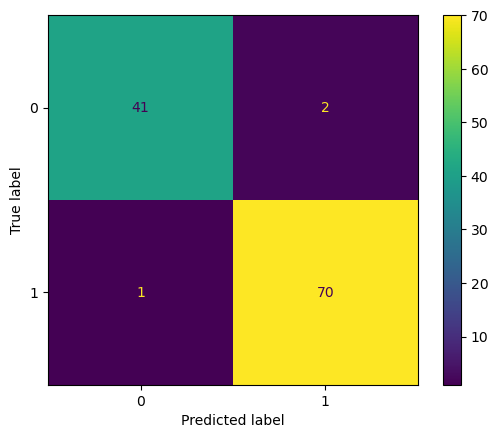

In [49]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

